## Set things up

In [1]:
import osmnx as ox
ox.config(log_console = True, data_folder = 'data')
graph = ox.load_graphml('nerails_with_pop.graphml')

In [2]:
import numpy as np
import networkx as nx
import pandas as pd
import collections
import matplotlib.pyplot as plt

np.random.seed(31416)

## Generate data

In [3]:
graph = graph.to_directed() # Some analyzing tasks hate if the graph is undirected.

In [4]:
extended_graph_stats = ox.extended_stats(graph)

In [5]:
print(extended_graph_stats.keys())

dict_keys(['avg_neighbor_degree', 'avg_neighbor_degree_avg', 'avg_weighted_neighbor_degree', 'avg_weighted_neighbor_degree_avg', 'degree_centrality', 'degree_centrality_avg', 'clustering_coefficient', 'clustering_coefficient_avg', 'clustering_coefficient_weighted', 'clustering_coefficient_weighted_avg', 'pagerank', 'pagerank_max_node', 'pagerank_max', 'pagerank_min_node', 'pagerank_min'])


In [6]:
node_df = pd.DataFrame.from_dict(dict(graph.nodes), orient='index')
node_df

,y,x,osmid,railway,name,population
306068527,53.876959,30.404060,306068527,station,Луполово,240.58267
3197892918,53.554208,10.066125,3197892918,station,Rauhes Haus,317.4676
252086216,53.837230,11.998196,252086216,station,Bützow,144.45564
5720557910,60.123637,11.464874,5720557910,station,Årnes,128.97055
273771068,53.933940,10.307888,273771068,station,Bad Segeberg,193.56854
...,...,...,...,...,...,...
2659070273,55.504397,28.565815,2659070273,station,Новополоцк,192.29211
1037851022,55.345984,12.325699,1037851022,station,Klippinge,75.90661
1032106117,57.804307,28.411424,1032106117,station,Берёзки,175.54535
1264749334,59.464694,33.819030,1264749334,station,Бор,120.966606


In [7]:
degree_df = pd.DataFrame.from_dict(dict(graph.degree), orient='index', columns=['degree'])
degree_df['degree'] //= 2
degree_df

,degree
306068527,2
3197892918,8
252086216,3
5720557910,2
273771068,3
...,...
2659070273,2
1037851022,3
1032106117,4
1264749334,2


In [8]:
exstats_df = pd.DataFrame.from_dict(extended_graph_stats)

unwanted_postfixes = ['_avg', '_node', '_max', '_min']
unwanted_columns = []
for c in exstats_df.columns:
    for postfix in unwanted_postfixes:
        if c.endswith(postfix):
            unwanted_columns.append(c)
            break
exstats_df = exstats_df.drop(columns=unwanted_columns)

exstats_df

,avg_neighbor_degree,avg_weighted_neighbor_degree,degree_centrality,clustering_coefficient,clustering_coefficient_weighted,pagerank
306068527,3.500000,0.276817,0.000798,0.000000,0.000000,0.000156
3197892918,7.000000,1.097788,0.003192,0.678571,0.021516,0.000278
252086216,4.000000,0.261663,0.001197,0.333333,0.022772,0.000170
5720557910,2.000000,0.142756,0.000798,0.000000,0.000000,0.000235
273771068,3.666667,0.173360,0.001197,0.333333,0.023174,0.000320
...,...,...,...,...,...,...
2659070273,4.500000,0.444918,0.000798,1.000000,0.048475,0.000124
1037851022,2.666667,0.413014,0.001197,0.333333,0.008012,0.000308
1032106117,3.000000,0.364268,0.001596,0.333333,0.010376,0.000240
1264749334,3.000000,0.991077,0.000798,1.000000,0.017079,0.000146


In [9]:
full_df = node_df.\
    merge(degree_df, left_index = True, right_index = True).\
    merge(exstats_df, left_index = True, right_index = True)

info_columns = ['osmid', 'railway', 'name']
y_columns = ['population']
other_columns = full_df.columns.tolist()
for i in info_columns: other_columns.remove(i)
for y in y_columns: other_columns.remove(y)
full_df = full_df[info_columns + y_columns + other_columns]
full_df

,osmid,railway,name,population,y,x,degree,avg_neighbor_degree,avg_weighted_neighbor_degree,degree_centrality,clustering_coefficient,clustering_coefficient_weighted,pagerank
306068527,306068527,station,Луполово,240.58267,53.876959,30.404060,2,3.500000,0.276817,0.000798,0.000000,0.000000,0.000156
3197892918,3197892918,station,Rauhes Haus,317.4676,53.554208,10.066125,8,7.000000,1.097788,0.003192,0.678571,0.021516,0.000278
252086216,252086216,station,Bützow,144.45564,53.837230,11.998196,3,4.000000,0.261663,0.001197,0.333333,0.022772,0.000170
5720557910,5720557910,station,Årnes,128.97055,60.123637,11.464874,2,2.000000,0.142756,0.000798,0.000000,0.000000,0.000235
273771068,273771068,station,Bad Segeberg,193.56854,53.933940,10.307888,3,3.666667,0.173360,0.001197,0.333333,0.023174,0.000320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659070273,2659070273,station,Новополоцк,192.29211,55.504397,28.565815,2,4.500000,0.444918,0.000798,1.000000,0.048475,0.000124
1037851022,1037851022,station,Klippinge,75.90661,55.345984,12.325699,3,2.666667,0.413014,0.001197,0.333333,0.008012,0.000308
1032106117,1032106117,station,Берёзки,175.54535,57.804307,28.411424,4,3.000000,0.364268,0.001596,0.333333,0.010376,0.000240
1264749334,1264749334,station,Бор,120.966606,59.464694,33.819030,2,3.000000,0.991077,0.000798,1.000000,0.017079,0.000146


In [10]:
full_df['population'] = pd.to_numeric(full_df['population'])
full_df[full_df['population'] <= 0]

,osmid,railway,name,population,y,x,degree,avg_neighbor_degree,avg_weighted_neighbor_degree,degree_centrality,clustering_coefficient,clustering_coefficient_weighted,pagerank
3700486327,3700486327,station,Лужская-Сортировочная,0.0,59.628696,28.536554,4,3.750000,0.380627,0.001596,0.500000,0.018964,0.000256
5306982383,5306982383,station,ост.п.29 км,0.0,54.740763,20.078593,3,3.666667,0.555389,0.001197,0.333333,0.012900,0.000131
683061225,683061225,station,Энгозеро,0.0,65.790021,33.944432,2,2.000000,0.093322,0.000798,0.000000,0.000000,0.000203
3341493532,3341493532,station,Лельма,0.0,62.042308,40.243548,2,2.000000,0.123149,0.000798,0.000000,0.000000,0.000202
276637095,276637095,station,Глазаниха,0.0,63.789200,39.007631,2,2.000000,0.164043,0.000798,0.000000,0.000000,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264749336,1264749336,station,Астрачи,0.0,59.613546,33.632555,2,2.500000,0.307718,0.000798,0.000000,0.000000,0.000119
3624754597,3624754597,station,Altensalzkoth,0.0,52.739196,10.070232,2,2.500000,0.559768,0.000798,0.000000,0.000000,0.000113
5585115033,5585115033,station,442 км,0.0,52.514596,38.655118,2,2.000000,0.450226,0.000798,0.000000,0.000000,0.000213
3780921926,3780921926,station,Базево,0.0,53.468619,41.660815,2,2.000000,0.252885,0.000798,0.000000,0.000000,0.000187


## Generate training- and test datasets

In [11]:
X = full_df.loc[:, 'y':]
X

,y,x,degree,avg_neighbor_degree,avg_weighted_neighbor_degree,degree_centrality,clustering_coefficient,clustering_coefficient_weighted,pagerank
306068527,53.876959,30.404060,2,3.500000,0.276817,0.000798,0.000000,0.000000,0.000156
3197892918,53.554208,10.066125,8,7.000000,1.097788,0.003192,0.678571,0.021516,0.000278
252086216,53.837230,11.998196,3,4.000000,0.261663,0.001197,0.333333,0.022772,0.000170
5720557910,60.123637,11.464874,2,2.000000,0.142756,0.000798,0.000000,0.000000,0.000235
273771068,53.933940,10.307888,3,3.666667,0.173360,0.001197,0.333333,0.023174,0.000320
...,...,...,...,...,...,...,...,...,...
2659070273,55.504397,28.565815,2,4.500000,0.444918,0.000798,1.000000,0.048475,0.000124
1037851022,55.345984,12.325699,3,2.666667,0.413014,0.001197,0.333333,0.008012,0.000308
1032106117,57.804307,28.411424,4,3.000000,0.364268,0.001596,0.333333,0.010376,0.000240
1264749334,59.464694,33.819030,2,3.000000,0.991077,0.000798,1.000000,0.017079,0.000146


In [12]:
y = full_df['population']
y

306068527     240.582670
3197892918    317.467600
252086216     144.455640
5720557910    128.970550
273771068     193.568540
                 ...    
2659070273    192.292110
1037851022     75.906610
1032106117    175.545350
1264749334    120.966606
148503389      68.179230
Name: population, Length: 5014, dtype: float64

In [13]:
import sklearn.preprocessing as skp

#poly = skp.PolynomialFeatures(2, include_bias=False)
poly = skp.PolynomialFeatures(interaction_only = True, include_bias=False)
X_poly = poly.fit_transform(X)
f'{", ".join(poly.get_feature_names(X.columns)[:21])}... ({X_poly.shape[1]} total features)'

'y, x, degree, avg_neighbor_degree, avg_weighted_neighbor_degree, degree_centrality, clustering_coefficient, clustering_coefficient_weighted, pagerank, y x, y degree, y avg_neighbor_degree, y avg_weighted_neighbor_degree, y degree_centrality, y clustering_coefficient, y clustering_coefficient_weighted, y pagerank, x degree, x avg_neighbor_degree, x avg_weighted_neighbor_degree, x degree_centrality... (45 total features)'

In [14]:
import sklearn.model_selection as skm

X_train, X_test, y_train, y_test = skm.train_test_split(X_poly, y, test_size=0.1)
X_train.shape

(4512, 45)

## Train model

In [15]:
import sklearn.linear_model as skl

model = skl.LassoCV(max_iter = 5000, normalize = True, cv=50)
model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=50, eps=0.001, fit_intercept=True,
        max_iter=5000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

## Plot results

(-0.32457464109505896,
 2.9446156409947313,
 4963.175216799046,
 61127.28121555498)

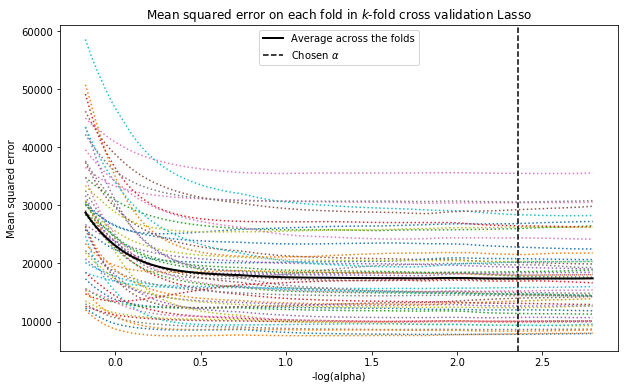

In [16]:
m_log_alphas = -np.log10(model.alphas_ + 1e-4)

plt.figure(figsize=(10, 6))
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + 1e-4), linestyle='--', color='k',
            label='Chosen $\\alpha$')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold in $k$-fold cross validation Lasso')
plt.axis('tight')

In [17]:
import sklearn.metrics as skmet

y_pred = model.predict(X_test)
test_mse = skmet.mean_squared_error(y_test, y_pred)
var = np.var(full_df['population'])

f'Unexplained variance: {test_mse / var}'

'Unexplained variance: 0.4728579673024089'

In [18]:
coefs_bigger_than_zero = model.coef_ > 0

print(f'Intercept: {model.intercept_}')
print('\n'.join(f'{coef}: {value}' for coef, value in zip(
    np.array(poly.get_feature_names(X.columns))[coefs_bigger_than_zero],
    model.coef_[coefs_bigger_than_zero]
)))

Intercept: 62.72420142387182
avg_weighted_neighbor_degree: 1.3411052380291402
clustering_coefficient: 139.9586351811526
x avg_neighbor_degree: 0.24349491516374325
x avg_weighted_neighbor_degree: 4.679169151301367
x clustering_coefficient_weighted: 13.897421213403769
x pagerank: 3499.122912977574
avg_neighbor_degree pagerank: 33200.289158883905
avg_weighted_neighbor_degree pagerank: 752796.0594359131


In [19]:
g2 = graph.copy()

for n, d in g2.nodes.items():
    with_interactions = poly.transform(np.array(X.loc[n]).reshape(1, -1))
    d['predicted_pop'] = float(model.predict(with_interactions)[0])
    if type(d['population']) == str:
        d['population'] = float(d['population'])
    d['pop_predict_error'] = d['population'] - d['predicted_pop']
    d['pop_predict_squared_error'] = (d['pop_predict_error'])**2

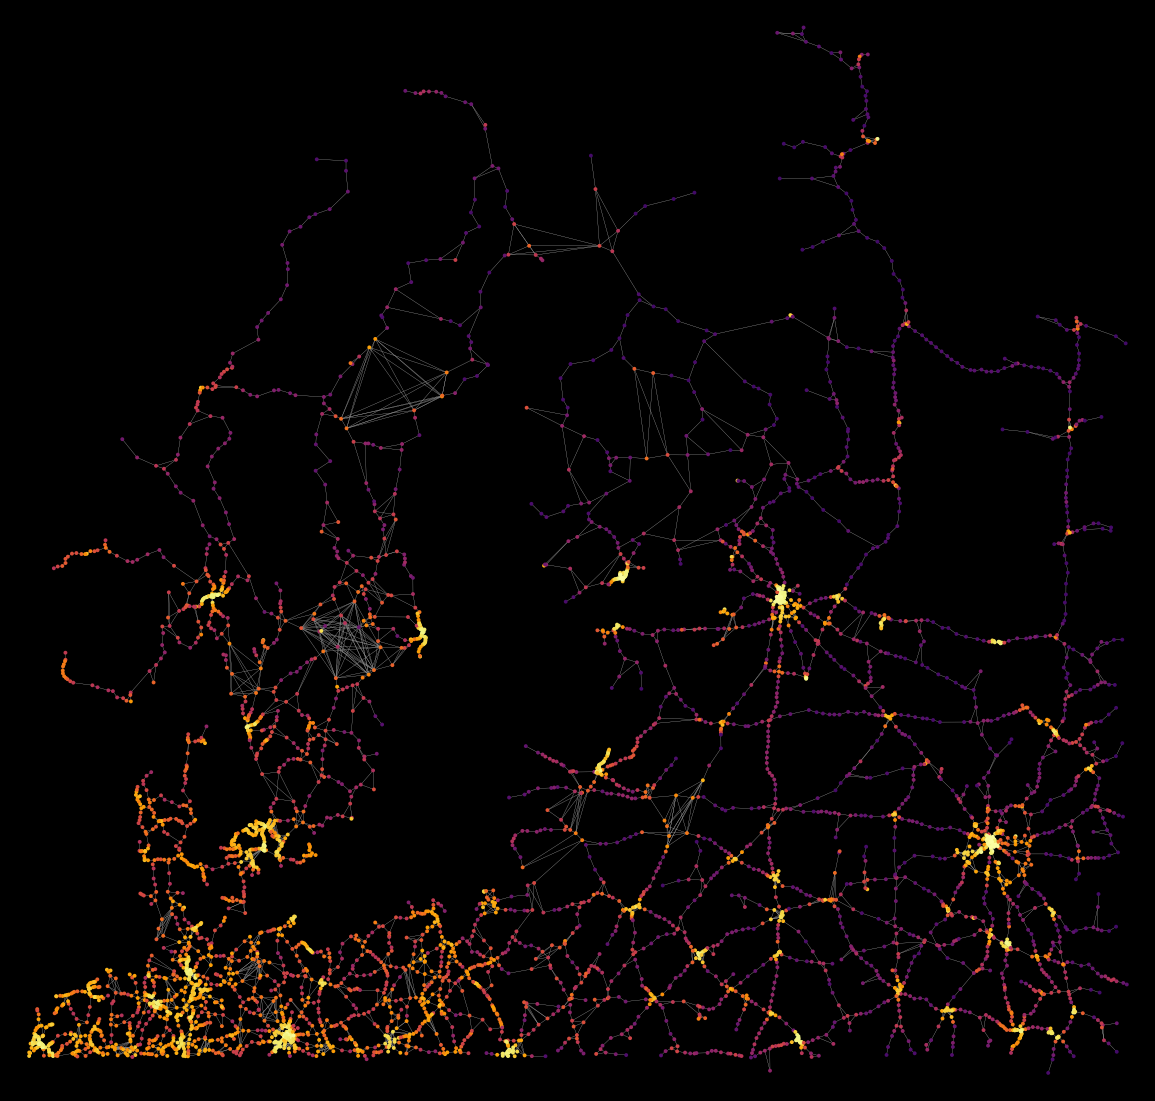

In [20]:
def plot_graph(series, G):
    df = pd.DataFrame(data=pd.Series(series).sort_values(), columns=['cc'])
    df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
    df = df.reindex(graph.nodes())
    nc = df['colors'].tolist()
    fig, ax = ox.plot_graph(G, bgcolor='black', node_color=nc, node_edgecolor='none', node_zorder=2,
                            edge_linewidth=0.2, edge_alpha=1, fig_height=20)
    
plot_graph({n: d['predicted_pop'] for n, d in g2.nodes.items()}, g2)

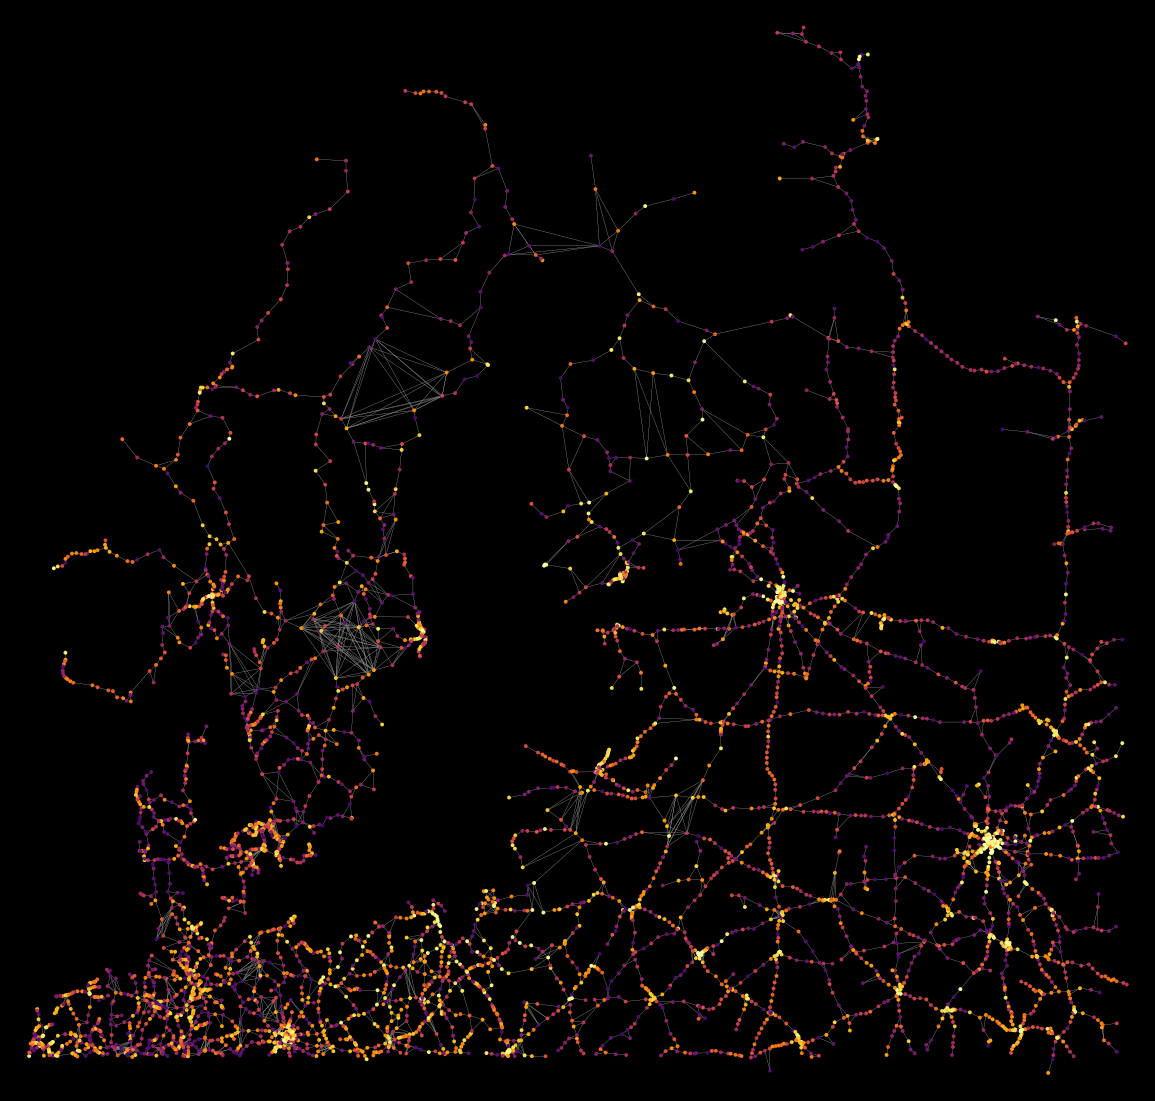

In [21]:
plot_graph({n: d['pop_predict_squared_error'] for n, d in g2.nodes.items()}, g2)

Text(0, 0.5, 'Predicted population')

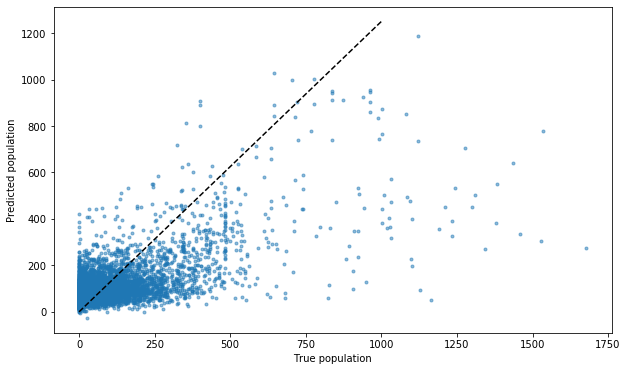

In [22]:
data_for_scatter = {n: {
    'predict': d['predicted_pop'],
    'error': d['pop_predict_error'],
    'population': d['population']
} for n, d in g2.nodes.items()}

df_for_scatter = pd.DataFrame.from_dict(data_for_scatter, orient='index')

plt.figure(figsize=(10, 6))
plt.scatter(df_for_scatter['population'], df_for_scatter['predict'], marker='.', alpha=.5)
plt.plot(np.linspace(0, 1000), np.linspace(0, 1250), color='black', linestyle='--')
plt.xlabel('True population')
plt.ylabel('Predicted population')

Text(0, 0.5, 'Prediction error')

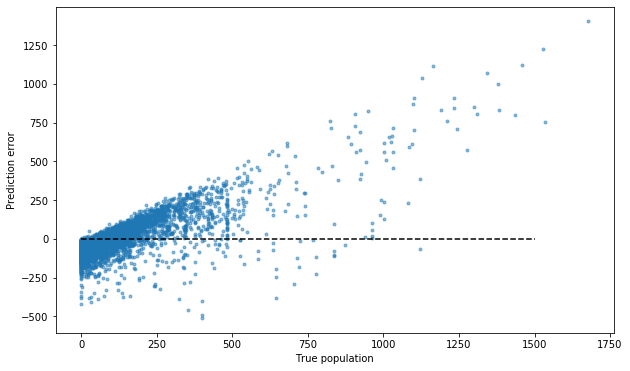

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_for_scatter['population'], df_for_scatter['error'], marker='.', alpha=.5)
xspace = np.linspace(0, 1500)
plt.plot(xspace, np.zeros(len(xspace)), color='black', linestyle='--')
plt.xlabel('True population')
plt.ylabel('Prediction error')